## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We check the distribution of variables for the column we want to predict.

In [3]:
# Calculate value counts for the Survived column

data.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

First, check for missing data and remove all columns containing missing data

In [4]:
# Calculate NA values per column

data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

We also drop columns that are not informative and contain too many unique values(e.g. name)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [8]:
# Calculate unique values for each column
print('\n'.join([f"Column with name '{c}' has {data[c].nunique()} unique values" for c in data.columns]))    

Column with name 'PassengerId' has 183 unique values
Column with name 'Survived' has 2 unique values
Column with name 'Pclass' has 3 unique values
Column with name 'Name' has 183 unique values
Column with name 'Sex' has 2 unique values
Column with name 'Age' has 63 unique values
Column with name 'SibSp' has 4 unique values
Column with name 'Parch' has 4 unique values
Column with name 'Ticket' has 127 unique values
Column with name 'Fare' has 93 unique values
Column with name 'Cabin' has 133 unique values
Column with name 'Embarked' has 3 unique values


In [9]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.

data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


In [11]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [12]:
# Use get_dummies to get a dataset with one hot encoded columns for categorical variables
# Survived should be excluded.

y = data['Survived']
X = data.drop('Survived', axis=1)
X = pd.get_dummies(X, drop_first=True)

In [13]:
# Let's check the new columns
X.dtypes



Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
               ...   
Cabin_F4        uint8
Cabin_G6        uint8
Cabin_T         uint8
Embarked_Q      uint8
Embarked_S      uint8
Length: 140, dtype: object

Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [14]:
# Split the dataset. Remember that the y arrays should include only the 'Survived' column which should be excluded from
# the X arrays
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# answer below:

knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train, y_train)
print(
    f'Train score: {knc.score(X_train, y_train)}\n'
    f'Test score: {knc.score(X_test, y_test)}\n'
)


Train score: 1.0
Test score: 0.5405405405405406



Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [16]:
# answer below:
# The model is overfitting. Training score is 1 and test score is much lower at 0.54



Let's optimize k. A good idea is to create plots that depict train and test accuracy for each candidate k. Since we have 2 classes, we will be selecting odd numbers in order to deal with possible ties. By selecting a really small k, e.g. k=1, we increase variance and the model is prone to overfitting since it will only take into account the nearest neighbor where there could be a lot of other close samples belonging to another class. By doing the opposite, selecting a big k we are prone to underfitting, as we increase bias as there is a higher probability to select the majority class.


In [17]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = range(1, 15, 2)

For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [18]:
# answer below:
for k in k_list:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    accuracy_train.append(knc.score(X_train, y_train))
    accuracy_test.append(knc.score(X_test, y_test))
    f1_train.append(f1_score(y_train, knc.predict(X_train)))
    f1_test.append(f1_score(y_test, knc.predict(X_test)))


In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

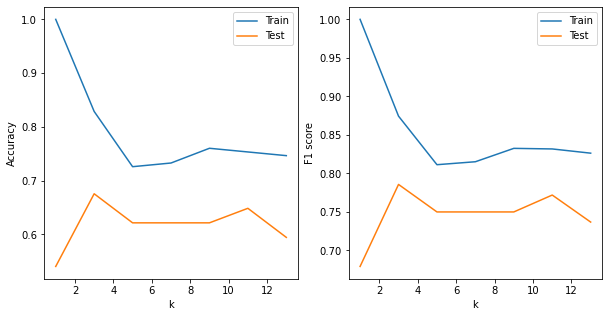

In [19]:
# answer below:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(k_list, accuracy_train)
plt.plot(k_list, accuracy_test)
plt.legend(['Train', 'Test'])
plt.xlabel('k')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(k_list, f1_train)
plt.plot(k_list, f1_test)
plt.legend(['Train', 'Test'])
plt.xlabel('k')
plt.ylabel('F1 score')

plt.show()

Please comment the results of the plots above

In [20]:
# Add your observations in comments below.
# k = 3 appears has the lowest generalization error for both f1 score and accuracy.
# But as you can see below re-running with a different train test split changes the results


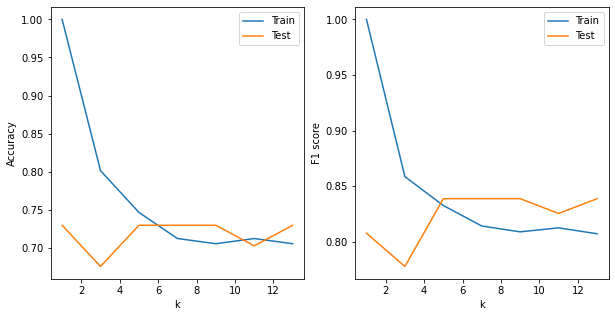

In [23]:
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = range(1, 15, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for k in k_list:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    accuracy_train.append(knc.score(X_train, y_train))
    accuracy_test.append(knc.score(X_test, y_test))
    f1_train.append(f1_score(y_train, knc.predict(X_train)))
    f1_test.append(f1_score(y_test, knc.predict(X_test)))
    
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(k_list, accuracy_train)
plt.plot(k_list, accuracy_test)
plt.legend(['Train', 'Test'])
plt.xlabel('k')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(k_list, f1_train)
plt.plot(k_list, f1_test)
plt.legend(['Train', 'Test'])
plt.xlabel('k')
plt.ylabel('F1 score')

plt.show()